In [9]:
import numpy as np
import matplotlib.pyplot as plt

import os

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

import utilities

In [11]:
data_dir = os.path.join('data', 'cats-and-dogs-filtered')

train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'validation')

train_cat_dir = os.path.join(data_dir, 'train', 'cats')
train_dog_dir = os.path.join(data_dir, 'train', 'dogs')

val_cat_dir = os.path.join(data_dir, 'validation', 'cats')
val_dog_dir = os.path.join(data_dir, 'validation', 'dogs')

test_dir = os.path.join('data', 'cats-and-dogs-test')

In [4]:
catdog_gen_aug = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)
train_data_aug = catdog_gen_aug.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

catdog_gen = ImageDataGenerator(rescale=1/255)
val_data = catdog_gen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=100,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
model2 = keras.Sequential([
    keras.layers.Conv2D(16, (3, 3), input_shape=(150, 150, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model2.summary()

model2.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [6]:
class EarlyStopCallback(keras.callbacks.Callback):
    def __init__(self, tr_acc=0.98, val_acc=0.98):
        super().__init__()
        self.tr_acc = tr_acc
        self.val_acc = val_acc
        
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy', 0) >= self.tr_acc
            and logs.get('val_accuracy', 0) >= self.val_acc):
            self.model.stop_training = True
            
            print(f'\n\nTraining accuracy exceeds {self.tr_acc*100:.1f}%.')
            print(f'Validation accuracy exceeds {self.val_acc*100:.1f}%.')
            print('Stop training.\n')

In [7]:
%%time

history2 = model2.fit(
    train_data_aug,
    epochs=100,
    validation_data=val_data,
    callbacks=[EarlyStopCallback()]
)

Epoch 1/100
100/100 [==============================] - 11s 82ms/step - loss: 0.8302 - accuracy: 0.5335 - val_loss: 1.0685 - val_accuracy: 0.5000
Epoch 2/100
100/100 [==============================] - 8s 78ms/step - loss: 0.6958 - accuracy: 0.5655 - val_loss: 0.6604 - val_accuracy: 0.6470
Epoch 3/100
100/100 [==============================] - 8s 78ms/step - loss: 0.6712 - accuracy: 0.6105 - val_loss: 0.6762 - val_accuracy: 0.6050
Epoch 4/100
100/100 [==============================] - 8s 79ms/step - loss: 0.6479 - accuracy: 0.6310 - val_loss: 0.5898 - val_accuracy: 0.6750
Epoch 5/100
100/100 [==============================] - 8s 79ms/step - loss: 0.6384 - accuracy: 0.6505 - val_loss: 0.5699 - val_accuracy: 0.7010
Epoch 6/100
100/100 [==============================] - 8s 80ms/step - loss: 0.6224 - accuracy: 0.6480 - val_loss: 0.7180 - val_accuracy: 0.6330
Epoch 7/100
100/100 [==============================] - 8s 78ms/step - loss: 0.6151 - accuracy: 0.6750 - val_loss: 0.5672 - val_accuracy

1/1 [==============================] - 0s 16ms/step


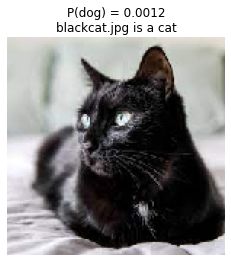

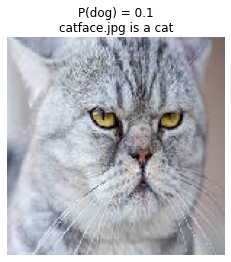

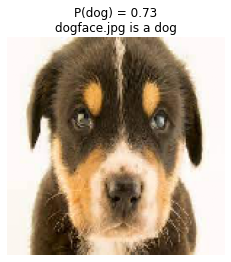

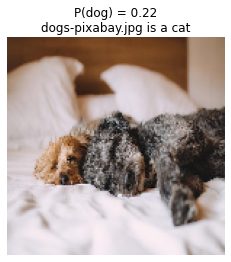

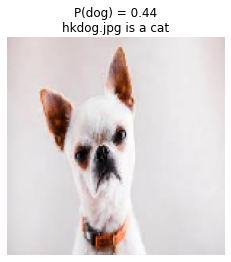

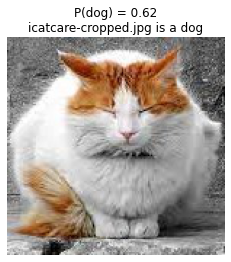

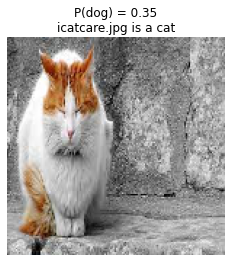

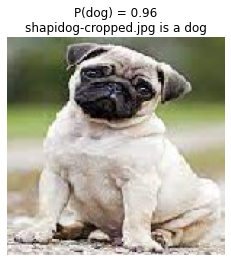

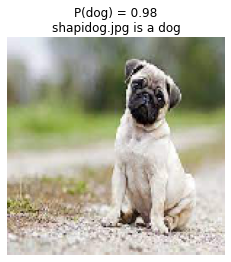

In [12]:
utilities.pred_binary_dir(model2, test_dir, cat0='cat', cat1='dog')

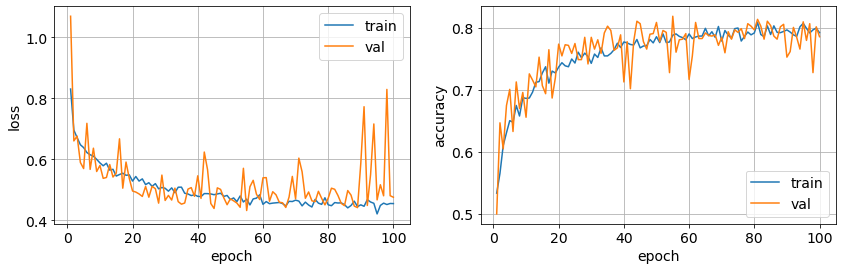

In [13]:
utilities.plot_train_val_metrics(history2, ('loss','accuracy'))

In [14]:
model3 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model3.summary()

model3.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 128)     

In [15]:
%%time

history3 = model3.fit(
    train_data_aug,
    epochs=100,
    validation_data=val_data,
    callbacks=[EarlyStopCallback()]
)

Epoch 1/100
100/100 [==============================] - 9s 81ms/step - loss: 0.7320 - accuracy: 0.5070 - val_loss: 0.6906 - val_accuracy: 0.5010
Epoch 2/100
100/100 [==============================] - 8s 78ms/step - loss: 0.6876 - accuracy: 0.5495 - val_loss: 0.6632 - val_accuracy: 0.6010
Epoch 3/100
100/100 [==============================] - 8s 79ms/step - loss: 0.6729 - accuracy: 0.5995 - val_loss: 0.7274 - val_accuracy: 0.5790
Epoch 4/100
100/100 [==============================] - 8s 79ms/step - loss: 0.6644 - accuracy: 0.6160 - val_loss: 0.5995 - val_accuracy: 0.6870
Epoch 5/100
100/100 [==============================] - 8s 79ms/step - loss: 0.6390 - accuracy: 0.6515 - val_loss: 0.6561 - val_accuracy: 0.6730
Epoch 6/100
100/100 [==============================] - 8s 79ms/step - loss: 0.6533 - accuracy: 0.6440 - val_loss: 0.6258 - val_accuracy: 0.6470
Epoch 7/100
100/100 [==============================] - 8s 80ms/step - loss: 0.6355 - accuracy: 0.6440 - val_loss: 0.5558 - val_accuracy:

1/1 [==============================] - 0s 16ms/step


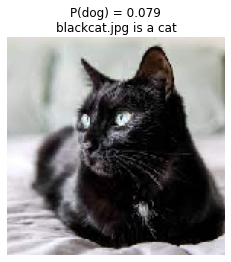

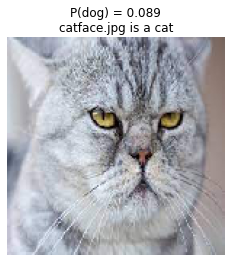

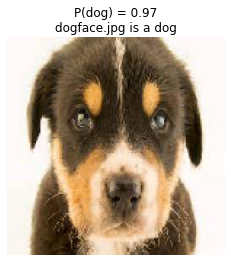

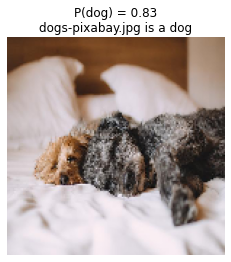

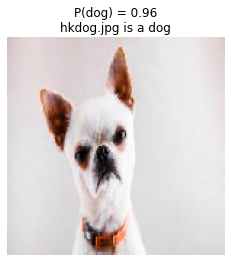

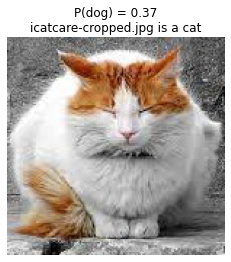

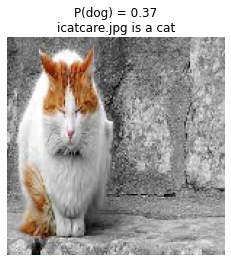

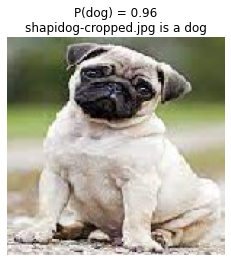

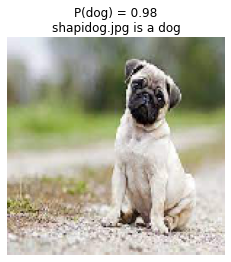

In [16]:
utilities.pred_binary_dir(model3, test_dir, cat0='cat', cat1='dog')

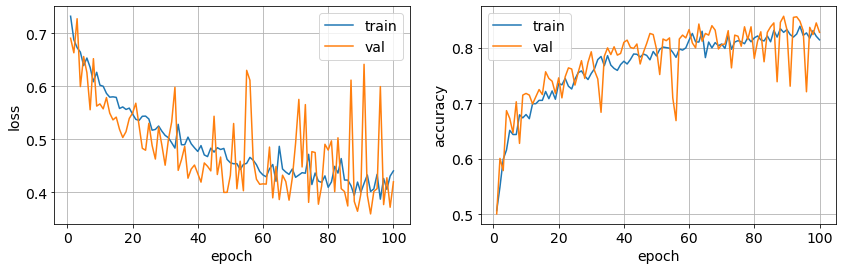

In [17]:
utilities.plot_train_val_metrics(history3, ('loss','accuracy'))

In [18]:
model4 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model4.summary()

model4.compile(
    loss='binary_crossentropy',
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 17, 17, 128)     

In [19]:
%%time

history4 = model4.fit(
    train_data_aug,
    epochs=100,
    validation_data=val_data,
    callbacks=[EarlyStopCallback()]
)

Epoch 1/100
100/100 [==============================] - 9s 81ms/step - loss: 0.7772 - accuracy: 0.5300 - val_loss: 0.6837 - val_accuracy: 0.6380
Epoch 2/100
100/100 [==============================] - 8s 79ms/step - loss: 0.6957 - accuracy: 0.5405 - val_loss: 0.6591 - val_accuracy: 0.6270
Epoch 3/100
100/100 [==============================] - 8s 79ms/step - loss: 0.6966 - accuracy: 0.5555 - val_loss: 0.6815 - val_accuracy: 0.5550
Epoch 4/100
100/100 [==============================] - 8s 80ms/step - loss: 0.6572 - accuracy: 0.6045 - val_loss: 0.6106 - val_accuracy: 0.6540
Epoch 5/100
100/100 [==============================] - 8s 79ms/step - loss: 0.6575 - accuracy: 0.6095 - val_loss: 0.6133 - val_accuracy: 0.6620
Epoch 6/100
100/100 [==============================] - 8s 79ms/step - loss: 0.6592 - accuracy: 0.6400 - val_loss: 0.6471 - val_accuracy: 0.6120
Epoch 7/100
100/100 [==============================] - 8s 79ms/step - loss: 0.6482 - accuracy: 0.6260 - val_loss: 0.7660 - val_accuracy:

1/1 [==============================] - 0s 16ms/step


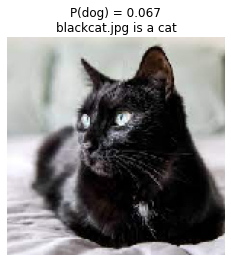

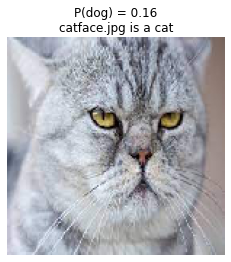

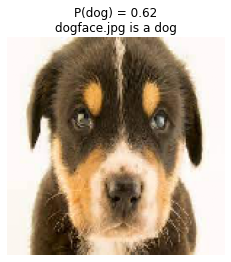

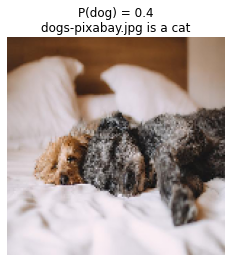

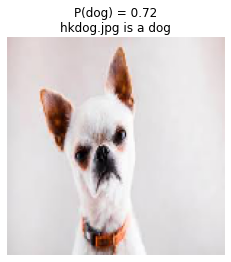

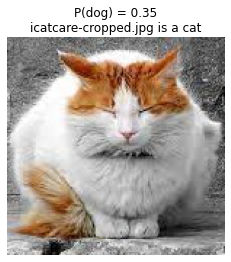

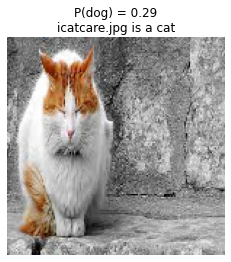

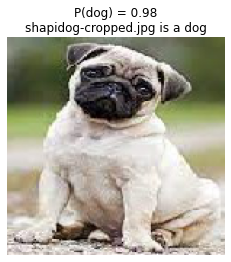

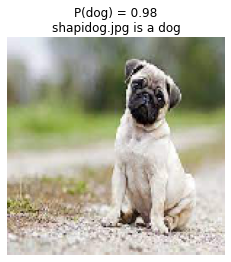

In [20]:
utilities.pred_binary_dir(model4, test_dir, cat0='cat', cat1='dog')

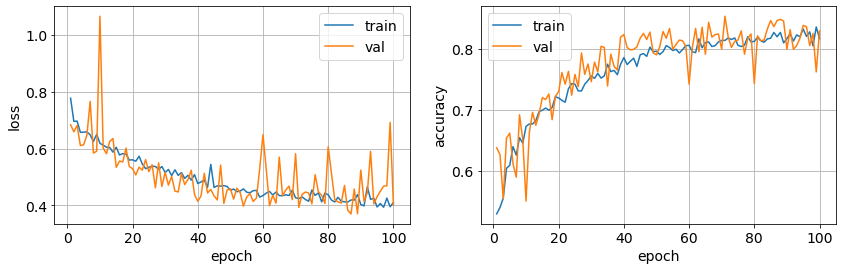

In [21]:
utilities.plot_train_val_metrics(history4, ('loss','accuracy'))